# Cluster plotter compatibility

You can use `napari-brainbow-diagnose` with `napari-cluster-plotter`.

`napari-cluster-plotter` use point_layer.features to store the data available axis.
Column with `CLUSTER` in their name can be used as cluster column.


In [1]:
import napari
from napari.utils import nbscreenshot
from napari_brainbow_diagnose import fetch_chroms_data
from napari_brainbow_diagnose import create_rgb_features_widget


import numpy as np

Create the viewer and populate it with brainbow layers and a random point layer

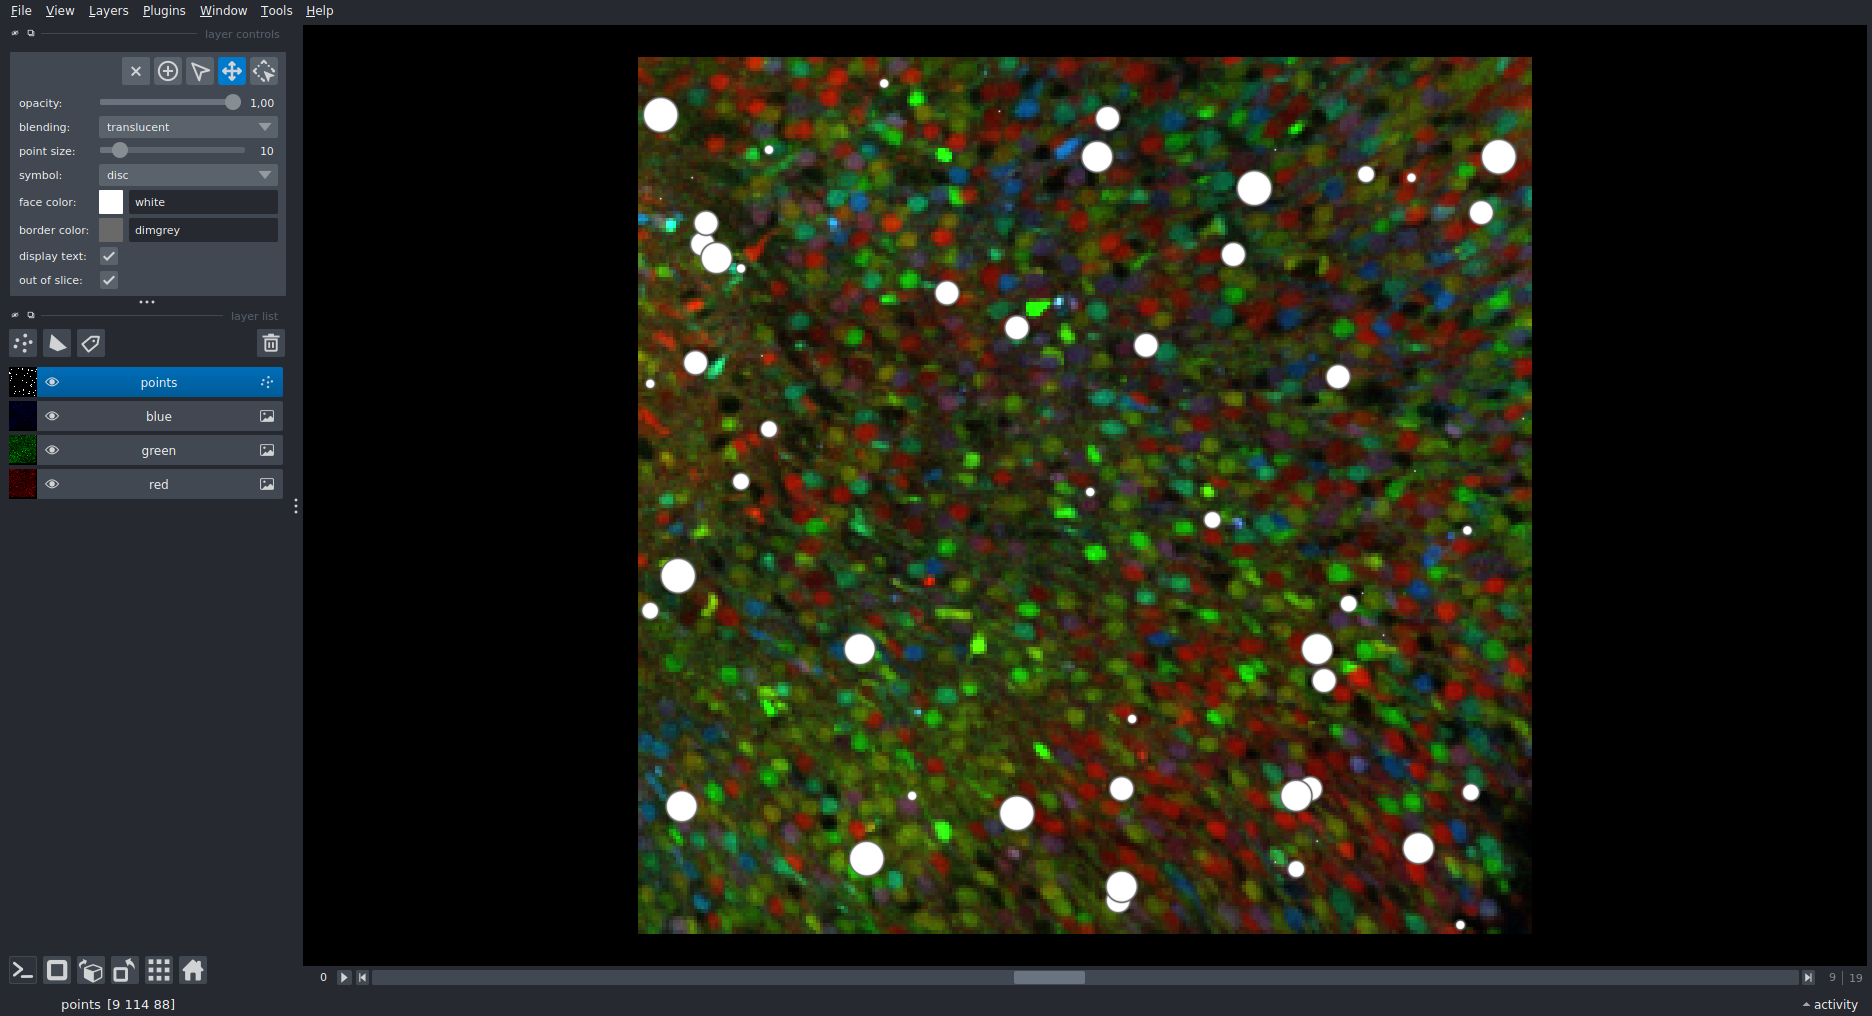

In [2]:
viewer = napari.Viewer()
bb = fetch_chroms_data()

red_layer = viewer.add_image(bb[:,0], name="red", colormap='red', blending='additive')
green_layer = viewer.add_image(bb[:,1], name="green", colormap='green', blending='additive')
blue_layer = viewer.add_image(bb[:,2], name="blue", colormap='blue', blending='additive')
n_points = 100
points = np.array([
    np.random.randint(0, bb.shape[0], n_points),
    np.random.randint(0, bb.shape[2], n_points),
    np.random.randint(0, bb.shape[3], n_points),
]).T

point_layer = viewer.add_points(points, out_of_slice_display=True)
nbscreenshot(viewer)

using the widget under `Plugins>Napari Brainbow Diagnose>Extract RGB features from brainbow image` you will add to the `point_layer.features` the RGB values of the brainbow image and all the available channel space in `napari-brainbow-diagnose`

In [3]:
create_rgb_features_widget(red_layer, green_layer, blue_layer, point_layer)

point_layer.features

,R,G,B,SELECTED_CLUSTER,H,S,V,wheel_x,wheel_y,X_maxwell,Y_maxwell,spherical_radius,spherical_theta,spherical_phi
0,13039.714286,9629.000000,2048.285714,0,0.114949,0.842919,13039.714286,0.816231,0.778615,0.256742,0.389570,229428.433338,1.445100,0.636059
1,36436.000000,6713.285714,3000.428571,0,0.018508,0.917652,36436.000000,0.955727,0.553235,0.418292,0.145468,229428.433338,1.489988,0.182205
2,21876.285714,22223.000000,1706.000000,0,0.169483,0.923233,22223.000000,0.723698,0.903793,0.254235,0.485162,229428.433338,1.516143,0.793260
3,18631.571429,15035.714286,10639.428571,0,0.091679,0.428957,18631.571429,0.679868,0.616828,0.104144,0.339355,229428.433338,1.152619,0.678996
4,15050.142857,12544.857143,1749.000000,0,0.135275,0.883788,15050.142857,0.791657,0.831974,0.261703,0.427510,229428.433338,1.481765,0.694859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12048.714286,12344.714286,9325.000000,0,0.183004,0.244616,12344.714286,0.549978,0.611631,0.046637,0.366112,229428.433338,1.075215,0.797532
96,14964.714286,6539.714286,4115.285714,0,0.037244,0.725001,14964.714286,0.852620,0.584056,0.244496,0.255261,229428.433338,1.323947,0.411998
97,7558.571429,23961.571429,5115.714286,0,0.311729,0.786503,23961.571429,0.351270,0.864041,0.038497,0.654047,229428.433338,1.369935,1.265230
98,4985.571429,4083.285714,4023.857143,0,0.010299,0.192900,4985.571429,0.596248,0.506237,0.042409,0.311875,229428.433338,1.012625,0.686232


You can now use the `napari-cluster-plotter` to plot the data. For example using the maxwell representation

In [4]:
from napari_clusters_plotter import PlotterWidget

pw = PlotterWidget(viewer)
pw.plot_x_axis.setCurrentIndex(9)
pw.plot_y_axis.setCurrentIndex(10)
viewer.window.add_dock_widget(pw, area='right')

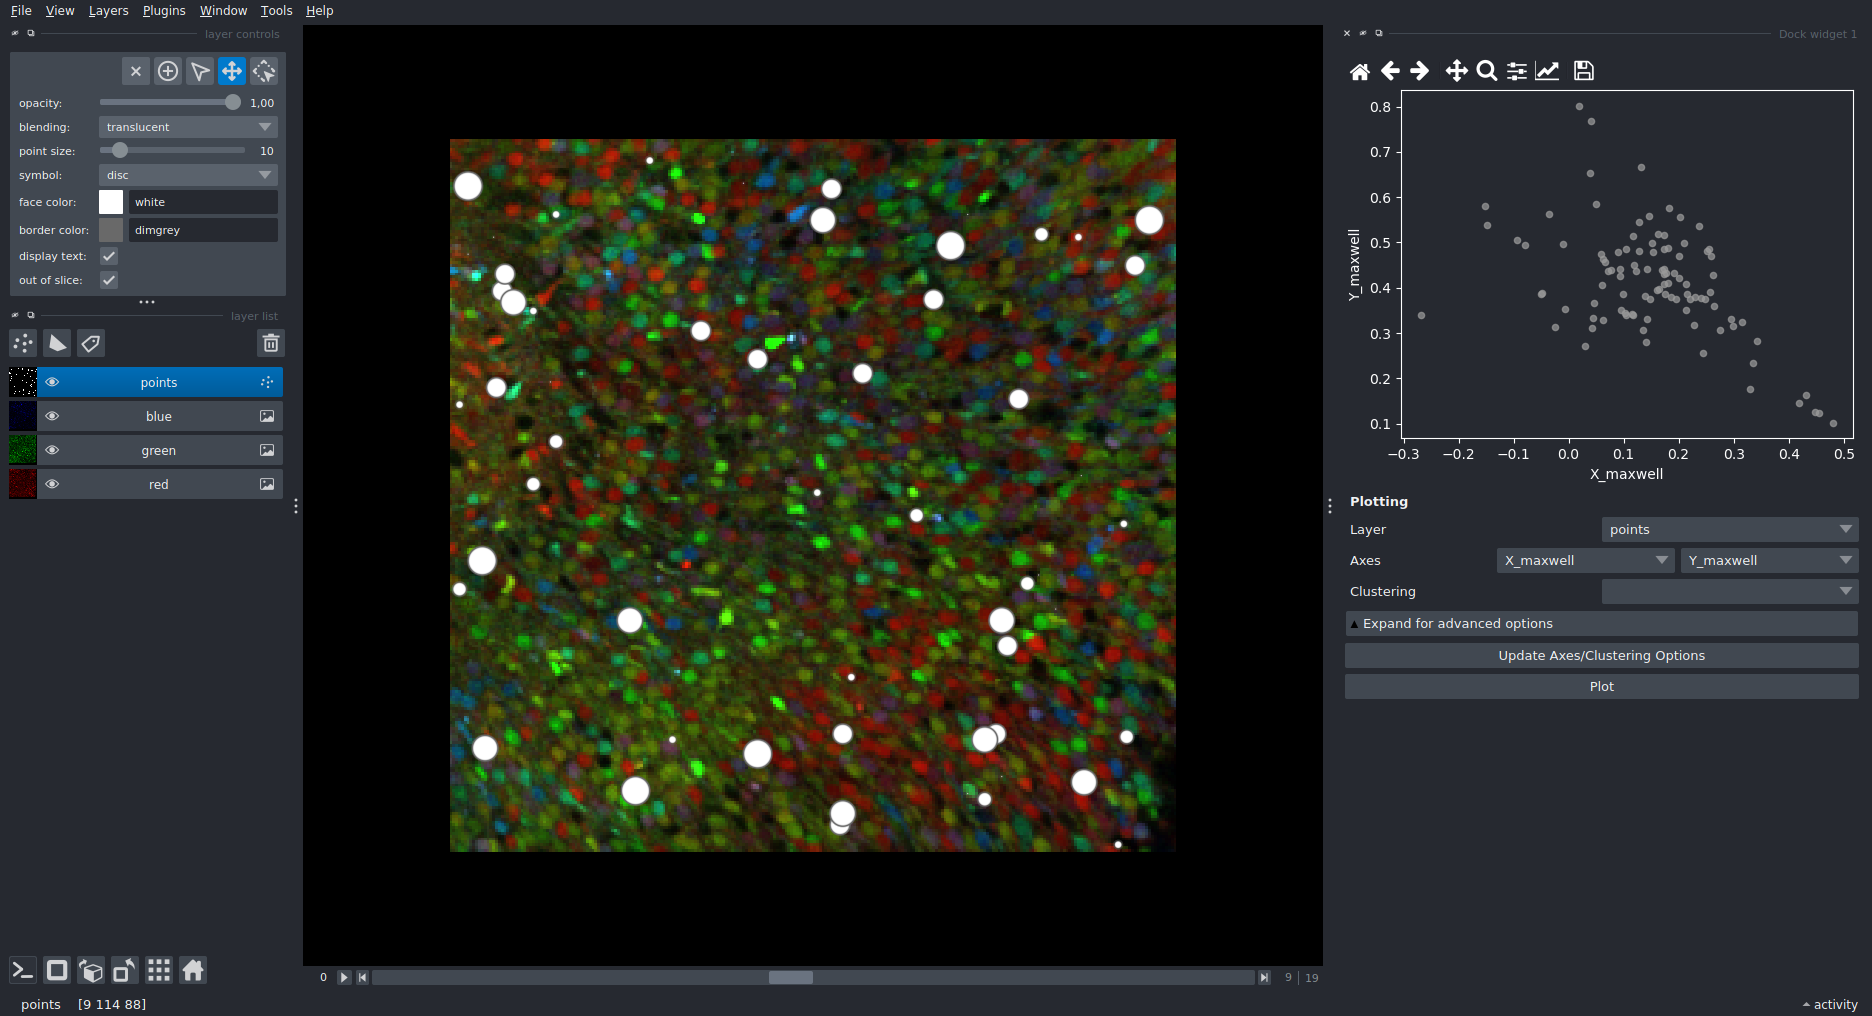

In [5]:
pw.run(point_layer.features, "X_maxwell", "Y_maxwell")
nbscreenshot(viewer)


If you want to cluster the points according to the point you select on the image you can use the `SELECTED_CLUSTER` feature column

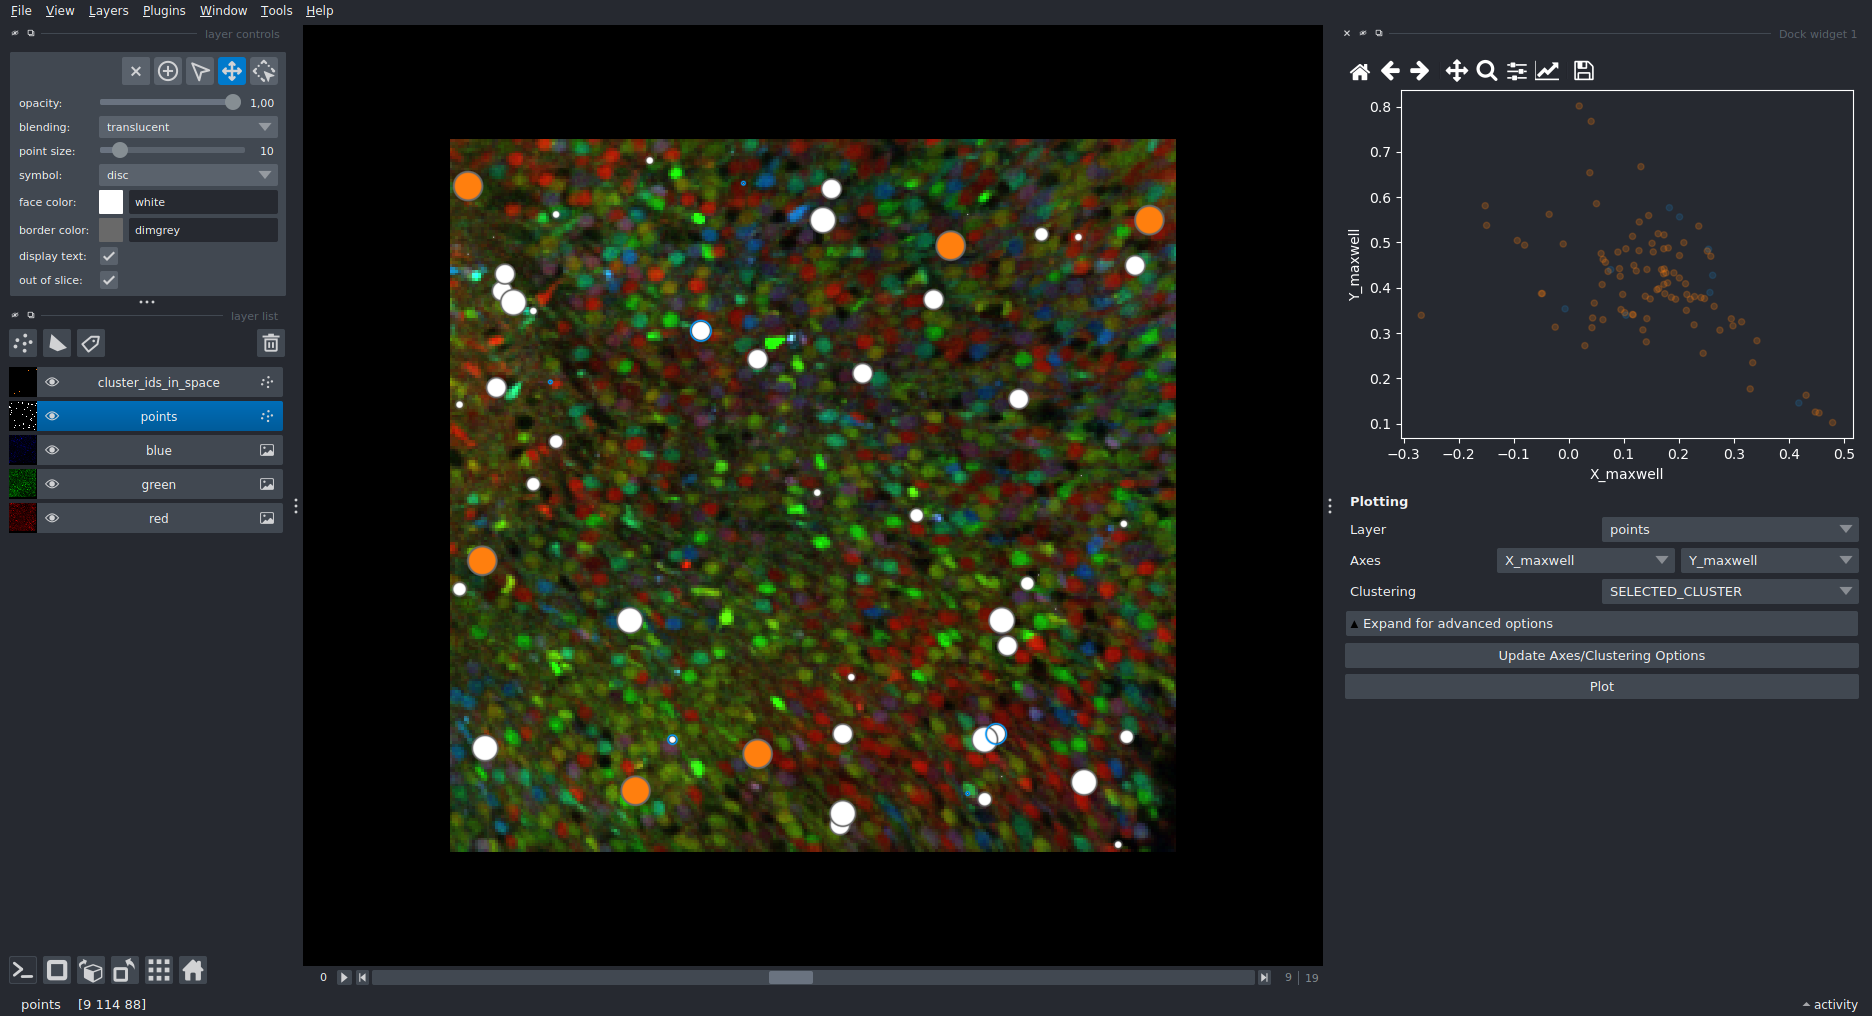

In [6]:
point_layer.selected_data = [0, 1, 2, 3, 4, 5, 10, 11, 12]
pw.plot_cluster_id.setCurrentIndex(1)
pw.run(point_layer.features, "X_maxwell", "Y_maxwell", "SELECTED_CLUSTER")
nbscreenshot(viewer)


You can also use the `napari-cluster-plotter` to plot the histogram of the data.

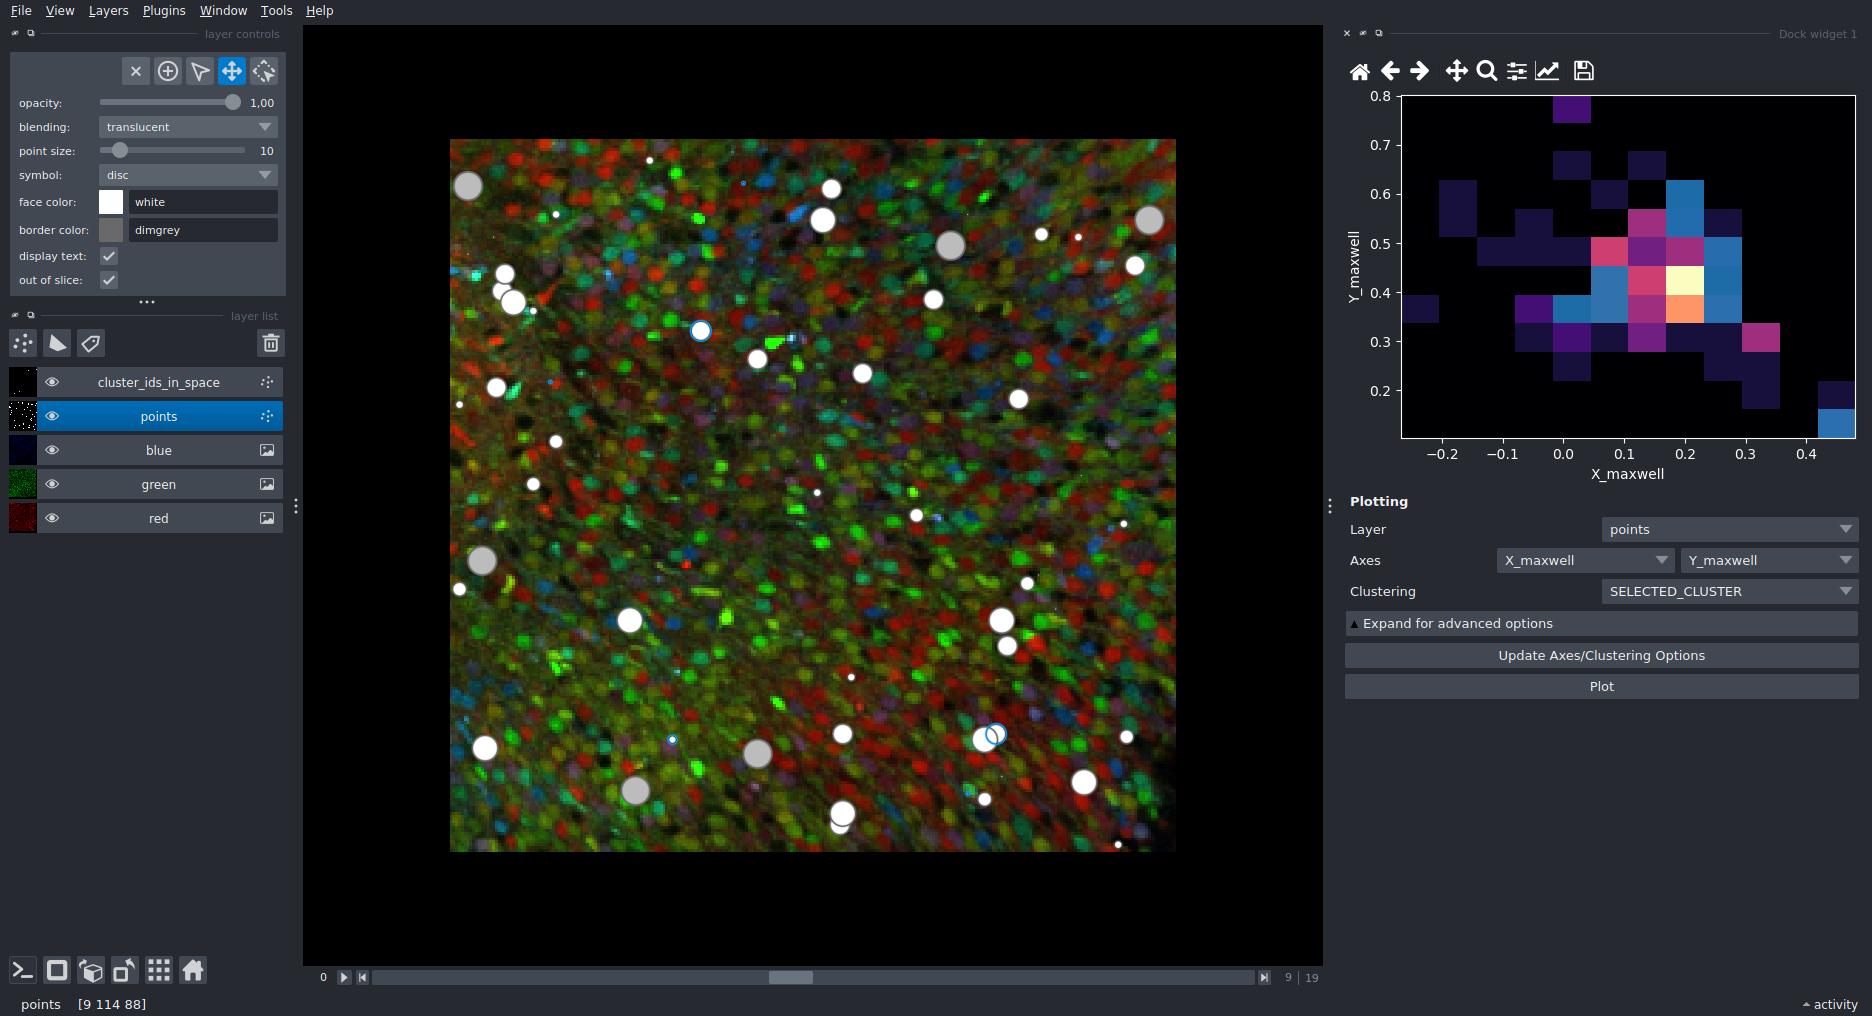

In [7]:
pw.plotting_type.setCurrentIndex(1)
pw.bin_number_manual_container
nbscreenshot(viewer)
